In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
df = pd.read_csv('/Users/jakobschlierf/Desktop/Master/Thesis/Files/Submissions/score/date_db.csv')

In [4]:
df= df.drop([0,1],axis=0)

In [5]:
df.sum()

Unnamed: 0        2020-03-012020-03-022020-03-032020-03-042020-0...
num_comments                                             13052505.0
num_comments.1                                           10578558.0
num_comments.2                                            1118446.0
dtype: object

In [6]:
df.rename(columns={'Unnamed: 0':'Date', 'num_comments': 'Anti_Vax', 'num_comments.1': 'Neutral', 'num_comments.2': 'Pro_vax'}, inplace=True)

In [7]:
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
df['total'] = df['Anti_Vax'] + df['Neutral'] + df['Pro_vax']

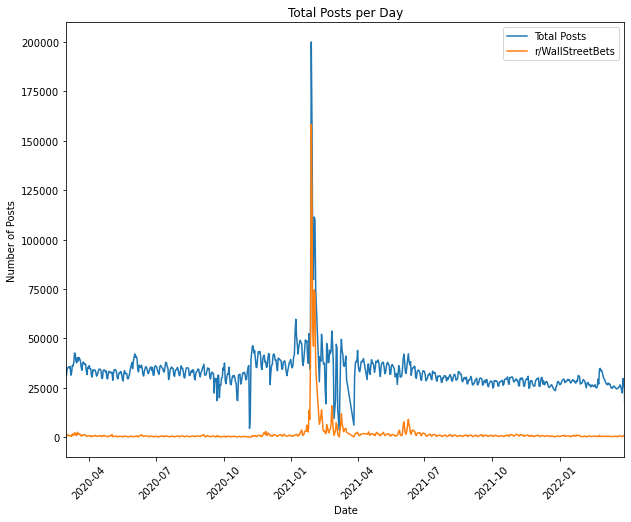

In [70]:
# plt.plot(df['Date'], df['Anti_Vax'], label='Anti_Vax')
# plt.plot(df['Date'], df['Neutral'], label='Neutral')
# plt.plot(df['Date'], df['Pro_vax'], label='Pro_vax')
plt.figure(figsize=(10,8))
plt.plot(df['Date'], df['total'], label='Total Posts')
plt.plot(agg['date'], agg['total'], label='r/WallStreetBets')
plt.title('Total Posts per Day')
plt.xlabel('Date')
plt.ylabel('Number of Posts')
plt.xlim((datetime(2020,3,1).date(), datetime(2022,3,30).date()))
plt.xticks(rotation=45)
plt.legend()

In [124]:
df[df['total'] > 75000]

,Date,Anti_Vax,Neutral,Pro_vax,total
335,2021-01-28,81891.0,53463.0,64516.0,199870.0
336,2021-01-29,67179.0,45309.0,44743.0,157231.0
337,2021-01-30,40938.0,28896.0,21039.0,90873.0
338,2021-01-31,36758.0,27024.0,16036.0,79818.0
339,2021-02-01,47199.0,33056.0,31156.0,111411.0
340,2021-02-02,48676.0,33059.0,28498.0,110233.0
341,2021-02-03,36173.0,25808.0,13484.0,75465.0


In [39]:
wsb = pd.read_pickle('../../Files/Submissions/score/d_wallstreetbets.pickle')

In [40]:
from datetime import datetime
wsb['date'] = pd.to_datetime([datetime.fromtimestamp(f) for f in wsb['created_utc']]).date

In [56]:
agg = wsb.groupby(['date', 'pred_1'], as_index=False).num_comments.count()

In [57]:
agg.head()

,date,pred_1,num_comments
0,2020-03-01,0.0,421
1,2020-03-01,1.0,104
2,2020-03-01,2.0,185
3,2020-03-02,0.0,701
4,2020-03-02,1.0,282


In [58]:
agg = agg.pivot(index='date',columns='pred_1')

In [59]:
agg.columns = agg.columns.droplevel(1)

In [60]:
agg.columns = ['Anti_Vax', 'Neutral', 'Pro_vax']

In [61]:
agg['total'] = agg['Anti_Vax'] + agg['Neutral'] + agg['Pro_vax']

In [62]:
agg[agg['total'] == agg['total'].max() ]

,Anti_Vax,Neutral,Pro_vax,total
date,,,,
2021-01-28,59495,35510,63217,158222


In [52]:
agg['date'] = agg.index

In [64]:
agg = agg.append({'date': datetime(2022, 3, 31).date(), 'Anti_Vax': 0, 'Neutral': 0, 'Pro_vax': 0, 'total': 0}, ignore_index=True)

/var/folders/fh/yf9jwszj6d5_1_xhfz_l6k000000gn/T/ipykernel_8268/4233603014.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  agg = agg.append({'date': datetime(2022, 3, 31).date(), 'Anti_Vax': 0, 'Neutral': 0, 'Pro_vax': 0, 'total': 0}, ignore_index=True)


In [63]:
agg.reset_index(inplace=True)

In [65]:
agg.tail()

,date,Anti_Vax,Neutral,Pro_vax,total
738,2022-03-27,210,57,68,335
739,2022-03-28,377,134,147,658
740,2022-03-29,484,166,196,846
741,2022-03-30,332,92,152,576
742,2022-03-31,0,0,0,0


In [82]:
df2 = df.copy()

In [71]:
agg[(agg['date']> datetime(2021,1,20 ).date()) & (agg['date']< datetime(2021,2,5 ).date())]

,date,Anti_Vax,Neutral,Pro_vax,total
326,2021-01-21,1676,681,714,3071
327,2021-01-22,3075,1628,1508,6211
328,2021-01-23,2035,859,862,3756
329,2021-01-24,1495,617,607,2719
330,2021-01-25,6339,3477,3906,13722
331,2021-01-26,4406,2271,2408,9085
332,2021-01-27,15221,9269,16092,40582
333,2021-01-28,59495,35510,63217,158222
334,2021-01-29,46043,27872,43627,117542
335,2021-01-30,22963,13582,19997,56542


In [72]:
agg[(agg['date']> datetime(2020,12,25 ).date()) & (agg['date']< datetime(2021,1,25 ).date())].mean()

/var/folders/fh/yf9jwszj6d5_1_xhfz_l6k000000gn/T/ipykernel_8268/3571848669.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  agg[(agg['date']> datetime(2020,12,25 ).date()) & (agg['date']< datetime(2021,1,25 ).date())].mean()


Anti_Vax     944.466667
Neutral      373.100000
Pro_vax      413.966667
total       1731.533333
dtype: float64

In [148]:
df2[(df2['Date']> datetime(2021,1,25 )) & (df2['Date']< datetime(2021,2,3 ))]

,index,Date,Anti_Vax,Neutral,Pro_vax,total,min_anti
331,333,2021-01-26,18173.0,13258.0,3126.0,34557.0,4406
332,334,2021-01-27,23888.0,15840.0,16512.0,56240.0,15221
333,335,2021-01-28,81891.0,53463.0,64516.0,199870.0,59495
334,336,2021-01-29,67179.0,45309.0,44743.0,157231.0,46043
335,337,2021-01-30,40938.0,28896.0,21039.0,90873.0,22963
336,338,2021-01-31,36758.0,27024.0,16036.0,79818.0,19374
337,339,2021-02-01,47199.0,33056.0,31156.0,111411.0,27795
338,340,2021-02-02,48676.0,33059.0,28498.0,110233.0,28379


In [83]:
df2.reset_index(inplace=True)

In [85]:
df2.drop('index',axis=1, inplace=True)

In [86]:
df2.head(10)

,Date,Anti_Vax,Neutral,Pro_vax,total,date
0,2020-03-01,14715.0,15977.0,772.0,31464.0,2
1,2020-03-02,16899.0,17022.0,919.0,34840.0,3
2,2020-03-03,17629.0,16655.0,1016.0,35300.0,4
3,2020-03-04,18059.0,16432.0,1067.0,35558.0,5
4,2020-03-05,17683.0,16402.0,1024.0,35109.0,6
5,2020-03-06,18097.0,16681.0,1011.0,35789.0,7
6,2020-03-07,15229.0,15537.0,654.0,31420.0,8
7,2020-03-08,15579.0,16304.0,701.0,32584.0,9
8,2020-03-09,18122.0,17216.0,1070.0,36408.0,10
9,2020-03-10,18358.0,16591.0,1058.0,36007.0,11


In [87]:
df2.drop(columns=('date'), inplace=True)

In [145]:
df2['min_anti'] = agg['Anti_Vax']

In [88]:
agg.head()

,date,Anti_Vax,Neutral,Pro_vax,total
0,2020-03-01,421,104,185,710
1,2020-03-02,701,282,297,1280
2,2020-03-03,668,290,286,1244
3,2020-03-04,460,156,206,822
4,2020-03-05,507,164,232,903


In [89]:
df2['Anti_Vax'] = df2['Anti_Vax'] - agg['Anti_Vax']

In [90]:
df2['Pro_vax'] = df2['Pro_vax'] - agg['Pro_vax']

In [91]:
df2['total'] = df2['total'] - agg['total']

In [117]:
df2.head()

,Date,Anti_Vax,Neutral,Pro_vax,total
2,2020-03-01,14047.0,15977.0,772.0,31464.0
3,2020-03-02,16439.0,17022.0,919.0,34840.0
4,2020-03-03,17122.0,16655.0,1016.0,35300.0
5,2020-03-04,17490.0,16432.0,1067.0,35558.0
6,2020-03-05,17288.0,16402.0,1024.0,35109.0


Text(0.5, 1.0, 'Posts by Classification and Day')

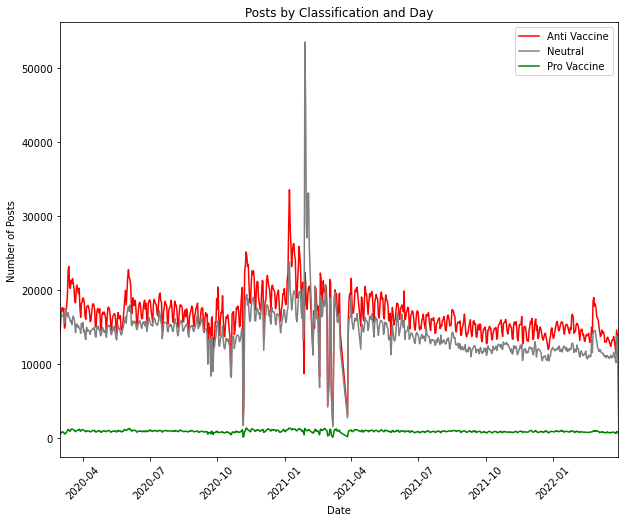

In [97]:
plt.figure(figsize=(10,8))
plt.plot(df2['Date'], df2['Anti_Vax'], label='Anti Vaccine', color='red')
plt.plot(df2['Date'], df2['Neutral'], label='Neutral', color='grey')
plt.plot(df2['Date'], df2['Pro_vax'], label='Pro Vaccine', color='green')
# plt.plot(df2['Date'], df2['total'], label='Total')
plt.ylim=(0,60000)
plt.xlim(datetime(2020, 3,1).date(),datetime(2022, 3,29).date())
plt.xticks(rotation=-45)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Number of Posts')
plt.xlim((datetime(2020,3,1).date(), datetime(2022,3,30).date()))
plt.xticks(rotation=45)
plt.title('Posts by Classification and Day')

In [98]:
df2[df2['Anti_Vax'] == df2["Anti_Vax"].max()]

,Date,Anti_Vax,Neutral,Pro_vax,total
312,2021-01-07,33518.0,23765.0,1296.0,58311.0


In [111]:
df2[(df2['Neutral'] > 30000) & (df2['Date'] < datetime(2022,3,1))]

,Date,Anti_Vax,Neutral,Pro_vax,total
333,2021-01-28,22396.0,53463.0,1299.0,41648.0
334,2021-01-29,21136.0,45309.0,1116.0,39689.0
337,2021-02-01,19404.0,33056.0,1033.0,36830.0
338,2021-02-02,20297.0,33059.0,1137.0,37727.0


In [102]:
df[df['Pro_vax'] == df['Pro_vax'].max()]

,Date,Anti_Vax,Neutral,Pro_vax,total,date
335,2021-01-28,81891.0,53463.0,64516.0,199870.0,335


(array([18353., 18444., 18536., 18628., 18718., 18809., 18901., 18993.,
        19083.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

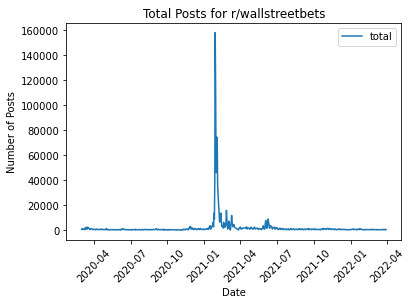

In [85]:

agg.plot('date', 'total')
plt.title("Total Posts for r/wallstreetbets")
plt.xlabel("Date")
plt.ylabel("Number of Posts")
plt.xticks(rotation=45)

In [72]:
agg[agg['date'] == datetime(2021,2,3 ).date()]

,date,Anti_Vax,Neutral,Pro_vax,total
339,2021-02-03,15681,9240,12342,37263


In [92]:
len(agg)

742

In [97]:
df2.tail()

,Date,Anti_Vax,Neutral,Pro_vax,total
740,2022-03-27,11109.0,10169.0,682.0,22444.0
741,2022-03-28,14612.0,13798.0,1015.0,29757.0
742,2022-03-29,NaN,11674.0,989.0,26863.0
743,2022-03-30,NaN,10516.0,971.0,24773.0
744,2022-03-31,NaN,501.0,216.0,1795.0


In [98]:
agg.tail()

,date,Anti_Vax,Neutral,Pro_vax,total
737,2022-03-26,277,81,124,482
738,2022-03-27,210,57,68,335
739,2022-03-28,377,134,147,658
740,2022-03-29,484,166,196,846
741,2022-03-30,332,92,152,576


In [93]:
len(df2)

743

In [86]:
df2['Anti_Vax'] = df2['Anti_Vax'] - agg['Anti_Vax']

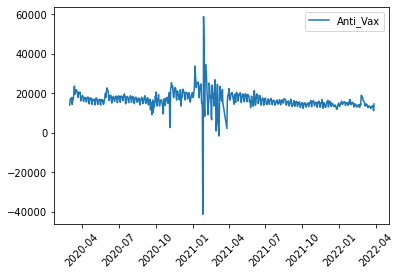

In [89]:
plt.plot(df2['Date'], df2['Anti_Vax'], label='Anti_Vax')
plt.xticks(rotation=45)
plt.legend()

In [91]:
df2[df2['Anti_Vax'] <0]

,Date,Anti_Vax,Neutral,Pro_vax,total
333,2021-01-26,-41322.0,13258.0,3126.0,34557.0
334,2021-01-27,-22155.0,15840.0,16512.0,56240.0
368,2021-03-07,-1652.0,1526.0,137.0,3542.0


## Comments

In [131]:
dfc = pd.read_csv('/Users/jakobschlierf/Desktop/Master/Thesis/Files/Comments/date_db.csv')

In [137]:
dfc.head()

,Date,Anti_Vax,Neutral,score.2
2,2020-03-01,12345.0,4524.0,567.0
3,2020-03-02,13701.0,4681.0,665.0
4,2020-03-03,14533.0,5167.0,625.0
5,2020-03-04,15864.0,5185.0,657.0
6,2020-03-05,14459.0,4873.0,591.0


In [133]:
dfc= dfc.drop([0,1],axis=0)

In [138]:
dfc.rename(columns={'Unnamed: 0':'Date', 'score': 'Anti_Vax', 'score.1': 'Neutral', 'score.2': 'Pro_vax'}, inplace=True)

In [135]:
dfc['Date'] = pd.to_datetime(dfc['Date'])

In [139]:
dfc['total'] = dfc['Anti_Vax'] + dfc['Neutral'] + dfc['Pro_vax']

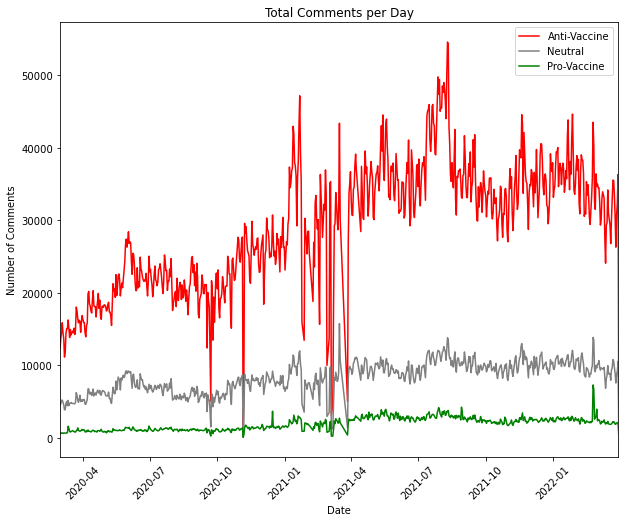

In [146]:

plt.figure(figsize=(10,8))
# plt.plot(dfc['Date'], dfc['total'], label='Total Comments', color='blue')
plt.plot(dfc['Date'], dfc['Anti_Vax'], label='Anti-Vaccine', color='red')
plt.plot(dfc['Date'], dfc['Neutral'], label='Neutral', color='grey')
plt.plot(dfc['Date'], dfc['Pro_vax'], label='Pro-Vaccine', color='green')
# plt.plot(agg['date'], agg['total'], label='r/WallStreetBets')
plt.title('Total Comments per Day')
plt.xlabel('Date')
plt.ylabel('Number of Comments')
plt.xlim((datetime(2020,3,1).date(), datetime(2022,3,30).date()))
plt.xticks(rotation=45)
plt.legend()

In [149]:
dfc[(dfc["Anti_Vax"] > 45000)]

,Date,Anti_Vax,Neutral,Pro_vax,total
328,2021-01-21,47186.0,11982.0,2821.0,61989.0
480,2021-07-14,45106.0,11782.0,3283.0,60171.0
481,2021-07-15,45318.0,12023.0,3339.0,60680.0
482,2021-07-16,45968.0,12042.0,3576.0,61586.0
486,2021-07-20,45760.0,11611.0,3194.0,60565.0
487,2021-07-21,45994.0,11812.0,3237.0,61043.0
493,2021-07-27,45947.0,11559.0,3418.0,60924.0
494,2021-07-28,49791.0,12055.0,3758.0,65604.0
495,2021-07-29,47407.0,12016.0,4160.0,63583.0
496,2021-07-30,49417.0,11870.0,3869.0,65156.0


In [157]:
dfc[dfc["Pro_vax"] == dfc["Pro_vax"].max()]

,Date,Anti_Vax,Neutral,Pro_vax,total
705,2022-02-24,43538.0,13842.0,7285.0,64665.0
